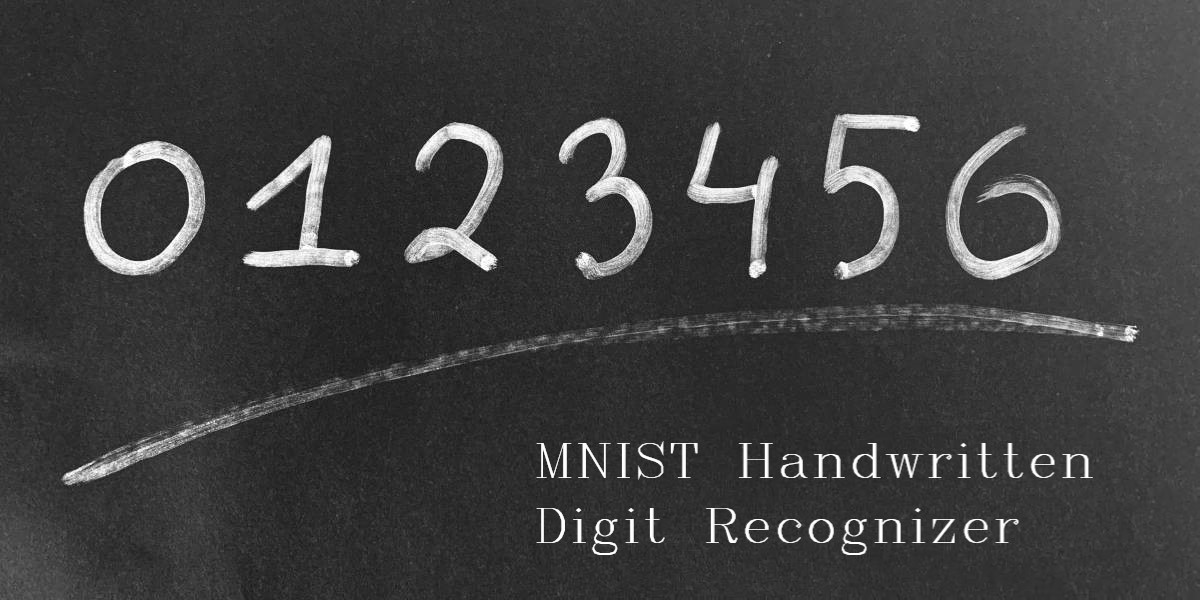

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df_Train=pd.read_csv('../input/digit-recognizer/train.csv')
df_Test=pd.read_csv('../input/digit-recognizer/test.csv')
df_Train.head()

In [ ]:
df_Test1=pd.read_csv('../input/digit-recognizer/test.csv')

In [ ]:
df_Test.head()

In [ ]:
print(df_Train.shape)
print(df_Test.shape)

In [ ]:
X = df_Train.iloc[:, 1:].values
y = df_Train.iloc[:, 0].values

In [ ]:
print(X.shape)
print(y.shape)

In [ ]:
sns.countplot(y)

In [ ]:
 plt.imshow(X[1400].reshape((28,28)),interpolation='nearest')

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X = X.reshape(X.shape[0], 28, 28, 1)
X.shape

In [ ]:
df_Test=scaler.fit_transform(df_Test)
df_Test = df_Test.reshape(df_Test.shape[0], 28, 28, 1)

In [ ]:
df_Test.shape

In [ ]:
y = y.reshape(y.shape[0], 1)
print (y.shape)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y)

print (y.shape)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=2)

In [ ]:
print(X_train.shape)
print(X_test.shape)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [ ]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [ ]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.0001)

model.summary()

In [ ]:
batch_size=95
epoch=10

In [ ]:
history = model.fit(X_train,y_train, batch_size=batch_size,
                              epochs = epoch, validation_data = (X_test,y_test), callbacks=[learning_rate_reduction])

In [ ]:
plt.plot(history.history['val_loss'], color='g', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.plot(history.history['accuracy'], color='b', label="Acuuracy")
plt.title("Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
plt.plot(history.history['loss'], color='r', label="loss")
plt.title("Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
plt.figure()
fig,(ax1, ax2)=plt.subplots(1,2,figsize=(10,4))
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.legend(['training','validation'])
ax1.set_title('loss')
ax1.set_xlabel('epoch')

ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])
ax2.legend(['training','validation'])
ax2.set_title('Acurracy')
ax2.set_xlabel('epoch')



score =model.evaluate(X_test,y_test,verbose=0)
print('Test Score:',score[0])
print('Test Accuracy:',score[1])

In [ ]:
from sklearn.metrics import confusion_matrix
pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
pred_classes = np.argmax(pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(6, 6))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
plt.imshow(X_test[120].reshape(28,28),interpolation='nearest')
plt.show()

In [ ]:
image = X_test[120]
test_img = image.reshape(1,28,28,1)

preds = model.predict(test_img)
print("The predicted number is: ",np.argmax(preds))

In [ ]:
results = model.predict(df_Test)
results = np.argmax(results,axis = 1)
results

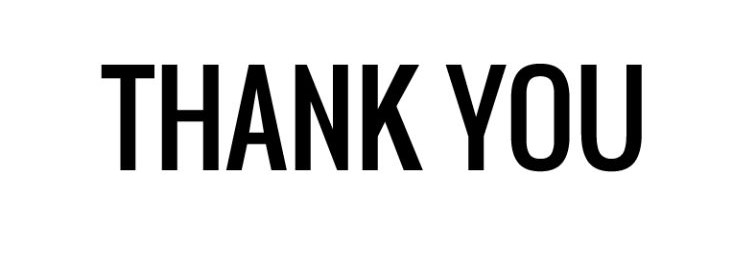